# Twitter Sentiment Analysis Project

## Overview
This project focuses on performing sentiment analysis on Twitter data to accurately predict the sentiment of tweets as positive, negative, or neutral. We have explored two distinct machine learning approaches: Support Vector Machine (SVM) with TF-IDF features and Long Short-Term Memory (LSTM) using one-hot encoding.

## Approach

### SVM with TF-IDF
The first approach employs the Support Vector Machine (SVM) classifier, leveraging the TF-IDF (Term Frequency-Inverse Document Frequency) vectorization technique. TF-IDF aids in converting each tweet into a numerical vector, effectively capturing the significance of words within the tweet relative to the entire dataset.

#### Model Performance
- Training Accuracy: 95.39%
- Validation Accuracy: 72.58%

### LSTM with One-Hot Encoding
The second approach harnesses the power of Long Short-Term Memory (LSTM) networks, a form of recurrent neural network (RNN), to discern intricate patterns within the sequential nature of tweets. The textual data is represented using one-hot encoding, which transforms words into unique binary vectors.

#### Model Performance
- Training Accuracy: 99.00%
- Test Accuracy: 71.00%

## Results and Insights
- The SVM model exhibits commendable performance on the training data, achieving an impressive accuracy of 95.39%. However, there is a noticeable drop in accuracy on the validation set, indicating potential overfitting.
- The LSTM model showcases remarkable training accuracy of 99.00%, emphasizing its capacity to capture complex sequential patterns within text. Nonetheless, the test accuracy of 71.00% suggests a certain degree of overfitting, necessitating further investigation and refinement.
- It is evident that the choice of features and model architectures significantly influences model performance. While the SVM model with TF-IDF performs better in terms of validation accuracy, the LSTM model demonstrates promise in comprehending the inherent sequential characteristics of text data.

## Conclusion
In this project, we have delved into two distinct methodologies for sentiment analysis on Twitter data. The SVM model, coupled with TF-IDF features, emerges as a robust performer, particularly in terms of validation accuracy. In contrast, the LSTM model, while achieving remarkable training accuracy, requires meticulous optimization to address overfitting and heighten its ability to generalize. This endeavor underscores the criticality of adeptly selecting features and models for tasks in natural language processing. Moving forward, this project serves as a stepping stone for refining sentiment analysis techniques and enhancing the precision of sentiment predictions for Twitter data.


### Importing the necessary libraries

In [39]:
# Data Manipulation
import pandas as pd

# Regular Expression
import re
import string

# Import Nltk libraries
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# Plot the Graphs
import seaborn as sns
import matplotlib.pyplot as plt

#Ignore the warnings
import warnings
warnings.filterwarnings("ignore")

### Data loading

In [40]:
# upgrading pandas
# !pip install --upgrade pandas

In [41]:
# Loading the data
data = pd.read_csv('sentiment_tweets_2022.csv', dtype_backend='pyarrow')

In [42]:
data.head(5)

,Unnamed: 0,User,User_Location,Followers_Count,User_Created,User_Description,User_Statuses_Count,Tweet_Date,Num_Likes,Num_Retweets,...,Tweet_Source,Tweet,Sentiment,Cleaned_Tweet,Pos_Tags,Adjectives,Nouns,Verbs,Named Entities,All Entities
0,0,Pucci1989Mon,<NA>,1790.0,2015-11-17 19:18:54+00:00,Most of my Tweets are an attempt at sarcasm …S...,35828.0,2023-01-30 17:34:45+00:00,0.0,0.0,...,Twitter Web App,@_angelica_toy Happy Anniversary!!!....The Day...,0.2444,_angelica_toy Happy Anniversary!!! The Day ...,"[('_angelica_toy', 'NN'), ('Happy', 'NNP'), ('...","['""American']","['_angelica_toy', 'Happy', 'Anniversary!!!', '...","['', '(In']","[('Anniversary', 'DATE'), ('The Day', 'DATE'),...","['Anniversary', 'The Day', ""Don McLean's"", 'Am..."
1,1,Pucci1989Mon,<NA>,1790.0,2015-11-17 19:18:54+00:00,Most of my Tweets are an attempt at sarcasm …S...,35828.0,2023-01-30 17:34:33+00:00,0.0,0.0,...,Twitter Web App,@McfarlaneGlenda Happy Anniversary!!!....The D...,0.2444,McfarlaneGlenda Happy Anniversary!!! The Da...,"[('McfarlaneGlenda', 'NNP'), ('Happy', 'NNP'),...","['""American']","['McfarlaneGlenda', 'Happy', 'Anniversary!!!',...","['', '(In']","[('McfarlaneGlenda', 'ORG'), ('Anniversary', '...","['McfarlaneGlenda', 'Anniversary', 'The Day', ..."
2,2,Pucci1989Mon,<NA>,1790.0,2015-11-17 19:18:54+00:00,Most of my Tweets are an attempt at sarcasm …S...,35828.0,2023-01-30 17:34:24+00:00,0.0,0.0,...,Twitter Web App,@thevivafrei @JustinTrudeau Happy Anniversary!...,0.2444,thevivafrei JustinTrudeau Happy Anniversary!!!...,"[('thevivafrei', 'NN'), ('JustinTrudeau', 'NNP...","['""American']","['thevivafrei', 'JustinTrudeau', 'Happy', 'Ann...","['', '(In']","[('thevivafrei JustinTrudeau', 'PERSON'), ('Th...","['thevivafrei JustinTrudeau', 'The Day', ""Don ..."
3,3,Pucci1989Mon,<NA>,1790.0,2015-11-17 19:18:54+00:00,Most of my Tweets are an attempt at sarcasm …S...,35828.0,2023-01-30 17:34:15+00:00,0.0,0.0,...,Twitter Web App,@NChartierET Happy Anniversary!!!....The Day t...,0.2444,NChartierET Happy Anniversary!!! The Day th...,"[('NChartierET', 'NNP'), ('Happy', 'NNP'), ('A...","['""American']","['NChartierET', 'Happy', 'Anniversary!!!', '',...","['', '(In']","[('NChartierET', 'PERSON'), ('Anniversary', 'D...","['NChartierET', 'Anniversary', 'The Day', ""Don..."
4,4,Pucci1989Mon,<NA>,1790.0,2015-11-17 19:18:54+00:00,Most of my Tweets are an attempt at sarcasm …S...,35828.0,2023-01-30 17:33:59+00:00,0.0,0.0,...,Twitter Web App,@tabithapeters05 Happy Anniversary!!!....The D...,0.2444,tabithapeters05 Happy Anniversary!!! The Da...,"[('tabithapeters05', 'NN'), ('Happy', 'NNP'), ...","['""American']","['tabithapeters05', 'Happy', 'Anniversary!!!',...","['', '(In']","[('The Day', 'DATE'), (""Don McLean's"", 'PERSON...","['The Day', ""Don McLean's"", 'American Pie', 'F..."


### EDA

In [43]:
# Shape of data
data.shape

(451332, 27)

In [44]:
# Copy the data to a new dataframe
df = data.copy()

In [45]:
# Checking if we have any nulls
df.isna().sum()

Unnamed: 0                  0
User                        0
User_Location          162833
Followers_Count             0
User_Created                0
User_Description        69280
User_Statuses_Count         0
Tweet_Date                  0
Num_Likes                   1
Num_Retweets                1
Num_Quotes                  0
Num_Replies                 0
Url                         0
Coordinates            446109
Tweet_Place            446112
Hashtags               310631
Tweet_Lang                  1
Tweet_Source                1
Tweet                       1
Sentiment                   0
Cleaned_Tweet              17
Pos_Tags                    0
Adjectives                  0
Nouns                       0
Verbs                       0
Named Entities              0
All Entities                0
dtype: int64

We don't need all the features. We only need 'Sentiment' and 'Cleaned_tweet'. Null values in other features does not affect our model.

In [46]:
# Selecting only specific features
select_columns = ['Sentiment' , 'Cleaned_Tweet']
new_df = df[select_columns]

In [47]:
# Display first five rows
new_df.head(5)

,Sentiment,Cleaned_Tweet
0,0.2444,_angelica_toy Happy Anniversary!!! The Day ...
1,0.2444,McfarlaneGlenda Happy Anniversary!!! The Da...
2,0.2444,thevivafrei JustinTrudeau Happy Anniversary!!!...
3,0.2444,NChartierET Happy Anniversary!!! The Day th...
4,0.2444,tabithapeters05 Happy Anniversary!!! The Da...


In [48]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 451332 entries, 0 to 451331
Data columns (total 2 columns):
 #   Column         Non-Null Count   Dtype          
---  ------         --------------   -----          
 0   Sentiment      451332 non-null  double[pyarrow]
 1   Cleaned_Tweet  451315 non-null  string[pyarrow]
dtypes: double[pyarrow](1), string[pyarrow](1)
memory usage: 73.2 MB


In [49]:
new_df.isna().sum()

Sentiment         0
Cleaned_Tweet    17
dtype: int64

Still there are some nulls in Cleaned_Tweet. We can drop them out.

In [50]:
new_df = new_df.dropna()

In [51]:
new_df.isna().sum()

Sentiment        0
Cleaned_Tweet    0
dtype: int64

In [52]:
new_df['Sentiment'].describe()

count    451315.000000
mean          0.334008
std           0.494349
min          -0.992700
25%           0.000000
50%           0.520900
75%           0.705200
max           0.997600
Name: Sentiment, dtype: double[pyarrow]

Max and min 'Sentiment' lies between 1 to -1. So, we are making all positive sentiment as positive category and vice versa.

In [53]:
# labels
sentiment_category = []

# Categorize sentiment
for score in new_df['Sentiment']:
    if score > 0:
        sentiment_category.append('positive')
    else:
        sentiment_category.append('negative')

# Create a new column with sentiment category
new_df['Sentiment_category'] = sentiment_category


This part is not needed unless we have the categorical data.

In [54]:
new_df.head(5)

,Sentiment,Cleaned_Tweet,Sentiment_category
0,0.2444,_angelica_toy Happy Anniversary!!! The Day ...,positive
1,0.2444,McfarlaneGlenda Happy Anniversary!!! The Da...,positive
2,0.2444,thevivafrei JustinTrudeau Happy Anniversary!!!...,positive
3,0.2444,NChartierET Happy Anniversary!!! The Day th...,positive
4,0.2444,tabithapeters05 Happy Anniversary!!! The Da...,positive


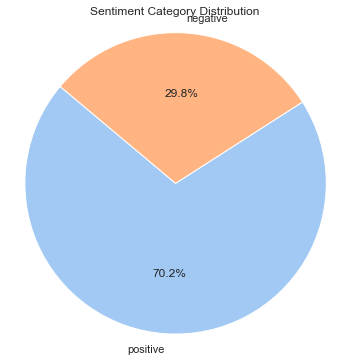

In [55]:
# Count the occurrences of each sentiment category
sentiment_counts = new_df['Sentiment_category'].value_counts()

# Create a pie chart
plt.figure(figsize=(6, 6))
sns.set(style="whitegrid")
sns.color_palette("pastel")
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("pastel"))
plt.title('Sentiment Category Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

Clearly our data is not balanced. We need to balance our dataset.

In [56]:
sentiment_counts

Sentiment_category
positive    316735
negative    134580
Name: count, dtype: int64

**Balancing our data**

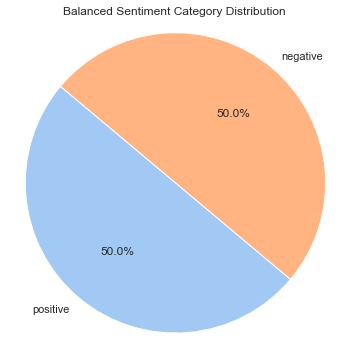

In [57]:
# Sample positive sentiment samples to balance the data
positive_samples = new_df[new_df['Sentiment_category'] == 'positive'].sample(n=sentiment_counts['negative'] , random_state=42)

# Concatenate the selected positive samples with the neutral and negative samples
balanced_df = pd.concat([positive_samples, new_df[new_df['Sentiment_category'] != 'positive']], ignore_index=True)

# Create a pie chart
plt.figure(figsize=(6, 6))
sns.set(style="whitegrid")
sns.color_palette("pastel")
plt.pie(balanced_df['Sentiment_category'].value_counts(), labels = balanced_df['Sentiment_category'].value_counts().index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("pastel"))
plt.title('Balanced Sentiment Category Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

In [58]:
from sklearn.preprocessing import LabelEncoder

# Instantiate the LabelEncoder
le = LabelEncoder()

# Fit and transform the column in the dataframe to get encoded labels
balanced_df['Sentiment_label'] = le.fit_transform(balanced_df['Sentiment_category'])

In [59]:
balanced_df.head()

,Sentiment,Cleaned_Tweet,Sentiment_category,Sentiment_label
0,0.4497,traceitback SolarsSouls Patriotgirl0000 Roman_...,positive,1
1,0.1027,goodblackdude The Freedom convoy should displa...,positive,1
2,0.3736,Bzubyk Wild guess? No one can answer that But...,positive,1
3,0.6369,Freedom Convoy weggejorist in Ottawa,positive,1
4,0.8360,A brilliant panel full of creative ideas on ho...,positive,1


In [60]:
from sklearn.utils import resample
# Getting only few samples
# Here we choose only 5000
sampled_data = resample(balanced_df, replace=True, n_samples=5000, random_state=42)

In [61]:
sampled_data.head(5)

,Sentiment,Cleaned_Tweet,Sentiment_category,Sentiment_label
121958,0.2422,FreedomConvoyCanada2022 Freedom Convoy Medi...,positive,1
146867,0.0000,Winter Freedom Convoy blockades cost billion...,negative,0
131932,0.6369,Emergencies Act Freedom Convoy Inquiry Live...,positive,1
259178,-0.2500,Ottawa Freedom Convoy Protest in Photos,negative,0
119879,0.5267,CBC admits that it spread disinformation on F...,positive,1


We are taking only the specific numbers of samples for the model operations.

In [62]:
# Resetting the index
sampled_data.reset_index(drop=True, inplace=True)
# Getting the content of respective index
sampled_data.loc[100, 'Cleaned_Tweet']

'Protests and Demonstrations have been futile as the Freedom Convoy Movement in Canada clearly showcased  The road for us is Awareness and Resistance  jagchat01 vigcit99'

In [63]:
sampled_data['Sentiment_category'].value_counts()

Sentiment_category
negative    2539
positive    2461
Name: count, dtype: int64

### Text Preprocessing

In [64]:
def remove_slang(tweet_tokens):
   # Additional slang terms and their meanings
    slangs = {
        'IMO': 'In My Opinion',
        'ICYMI': 'In Case You Missed It',
        'NSFW': 'Not Safe For Work',
        'TBT': 'Throwback Thursday',
        'AMA': 'Ask Me Anything',
        'FOMO': 'Fear Of Missing Out',
        'ROFL': 'Rolling On the Floor Laughing',
        'IRL': 'In Real Life',
        'YOLO': 'You Only Live Once',
        'FOMO': 'Fear Of Missing Out',
        'G2G': 'Got To Go',
        'JK': 'Just Kidding',
        'OMW': 'On My Way',
        'OOTD': 'Outfit Of The Day',
        'TFW': 'That Feeling When',
        'TBH': 'To Be Honest',
        'WYD': 'What You Doing',
        'AMA': 'Ask Me Anything',
        'BFF': 'Best Friends Forever',
        'BRB': 'Be Right Back',
        'AFK': 'Away From Keyboard',
        'ICYMI': 'In Case You Missed It',
        'SMH': 'Shaking My Head',
        'IDK': "I Don't Know",
        'BTW': 'By The Way',
        'FTW': 'For The Win',
        'MFW': 'My Face When',
        'NVM': 'Never Mind',
        'WTH': 'What The Heck',
        'ILY': 'I Love You',
        'LMK': 'Let Me Know',
        'LMAO': 'Laughing My A** Off',
        'OMG': 'Oh My God',
        'POV': 'Point Of View',
        'TTYL': 'Talk To You Later',
        'WYWH': 'Wish You Were Here',
        'AMA': 'Ask Me Anything',
        'BTW': 'By The Way',
        'SMH': 'Shaking My Head',
        'IDK': "I Don't Know",
        'FTW': 'For The Win',
        'FYI': 'For Your Information',
        'GTG': 'Got To Go',
        'HBD': 'Happy Birthday',
        'ICYMI': 'In Case You Missed It',
        'IMHO': 'In My Humble Opinion',
        'JK': 'Just Kidding',
        'LOL': 'Laugh Out Loud',
        'NP': 'No Problem',
        'OMW': 'On My Way',
        'OTW': 'On The Way',
        'ROFL': 'Rolling On the Floor Laughing',
        'TBH': 'To Be Honest',
        'TBT': 'Throwback Thursday',
        'TGIF': 'Thank God It’s Friday',
        'TMI': 'Too Much Information',
        'TTYL': 'Talk To You Later',
        'YOLO': 'You Only Live Once',
        'YW': 'You’re Welcome',
    }

    # Split the tweet text into words
    words = tweet_tokens.split()

    # Remove slang words from the list of words
    cleaned_words = [word for word in words if word not in slangs]

    # Rejoin the words to form the cleaned tweet text
    cleaned_tweet = ' '.join(cleaned_words)

    return cleaned_tweet

In [65]:
def remove_emojis(text):
    if not isinstance(text, str):
        return ''

    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags
                               u"\U00002500-\U00002BEF"  # Chinese/Japanese/Korean characters
                               u"\U00002702-\U000027B0"
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               u"\U0001f926-\U0001f937"
                               u"\U00010000-\U0010ffff"
                               "\u200d"  # zero width joiner
                               "\u2640-\u2642"  # gender specific emojis
                               "\u2600-\u2B55"  # weather emojis
                               "\u23cf"  # Eject button
                               "\u23e9"  # Fast forward button
                               "\u231a"  # Watch
                               "\ufe0f"  # Variants (text style, emoji style, etc.)
                               "\u3030"
                               "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

In [66]:
# Text Preprocessing Methods

def remove_urls(text):
    return re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)

def remove_usernames(text):
    return re.sub(r'@\w+', '', text)

def remove_punctuation(text):
    return text.translate(str.maketrans('', '', string.punctuation))

def remove_digits(text):
    return re.sub(r'\d+', '', text)

def remove_special_characters(text):
    return re.sub('[^A-Za-z0-9\s]+', '', text)

def remove_stopwords(tokenized_text):
    return [token for token in tokenized_text if token not in stop_words]

def lemmatize(tokenized_text):
    return [lemmatizer.lemmatize(token) for token in tokenized_text]

In [67]:
# modular function that cleans text.
def clean_text(text):

    text = text.lower()
    text = remove_urls(text)
    text = remove_usernames(text)
    text = remove_punctuation(text)
    text = remove_digits(text)
    text = remove_special_characters(text)
    text = remove_slang(text)
    text = remove_emojis(text)

    tokenized_text = word_tokenize(text)

    tokenized_text = remove_stopwords(tokenized_text)
    tokenized_text = lemmatize(tokenized_text)

    cleaned_text = ' '.join(tokenized_text)

    return cleaned_text

In [68]:
# nltk.download('stopwords')
# nltk.download('punkt')
# nltk.download('wordnet')

In [69]:
# Instantiate these objects once instead of every time the function is called
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

In [70]:
sampled_data['Cleaned_Tweet'] = sampled_data['Cleaned_Tweet'].apply(lambda x : clean_text(x))

In [71]:
sampled_data.head()

,Sentiment,Cleaned_Tweet,Sentiment_category,Sentiment_label
0,0.2422,freedomconvoycanada freedom convoy medium smea...,positive,1
1,0.0000,winter freedom convoy blockade cost billion ca...,negative,0
2,0.6369,emergency act freedom convoy inquiry live news...,positive,1
3,-0.2500,ottawa freedom convoy protest photo,negative,0
4,0.5267,cbc admits spread disinformation freedom convo...,positive,1


### SVM

 **Train Test Split**

In [72]:
from sklearn.model_selection import train_test_split

In [73]:
X_temp, X_test, y_temp, y_test = train_test_split(sampled_data['Cleaned_Tweet'], sampled_data['Sentiment_label'], test_size=0.4, random_state=42)

# Then split the temporary set into separate training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.4, random_state=42)


#### Feature Engineering

**TF-IDF**

In [74]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [79]:
# Vectorize the text data
vectorizer = TfidfVectorizer(max_features= 7148)
X_train_vect = vectorizer.fit_transform(X_train)
X_val_vect = vectorizer.transform(X_val)
X_test_vect = vectorizer.transform(X_test)

#### Model Training

In [81]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [83]:
# Create an instance of the SVM classifier (SVC)
classifier = SVC(kernel='linear')

# Train the classifier on the vectorized training data
classifier.fit(X_train_vect, y_train)

SVC(kernel='linear')

In [85]:
# Make predictions on the training, validation, and test data
y_train_pred = classifier.predict(X_train_vect)
y_val_pred = classifier.predict(X_val_vect)
y_test_pred = classifier.predict(X_test_vect)

In [86]:
# Calculate the accuracy on each dataset
train_accuracy = accuracy_score(y_train, y_train_pred)
val_accuracy = accuracy_score(y_val, y_val_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

#### Model Evaluation

Training Accuracy: 0.9538888888888889
Validation Accuracy: 0.7258333333333333
Test Accuracy: 0.738
Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.73      0.73       994
           1       0.74      0.75      0.74      1006

    accuracy                           0.74      2000
   macro avg       0.74      0.74      0.74      2000
weighted avg       0.74      0.74      0.74      2000

Confusion Matrix:
[[726 268]
 [256 750]]


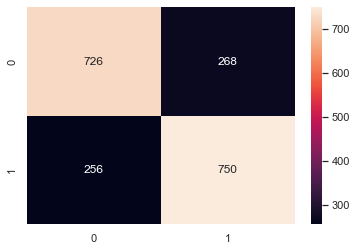

In [87]:
# Print the accuracies
print(f"Training Accuracy: {train_accuracy}")
print(f"Validation Accuracy: {val_accuracy}")
print(f"Test Accuracy: {test_accuracy}")

# Print the classification report
print("Classification Report:")
print(classification_report(y_test, y_test_pred))

# Print the confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_test_pred))

# Plot the confusion matrix
sns.heatmap(confusion_matrix(y_test, y_test_pred), annot=True, fmt='d')
plt.show()

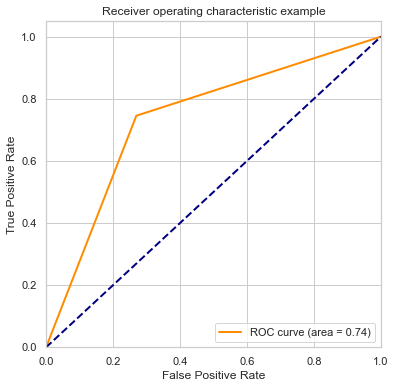

In [88]:
# plot roc-auc curve
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_test_pred)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()


#### Making Predictions

In [89]:
def predict_text(text):
    # Preprocess the text and transform using the SAME vectorizer
    preprocessed_text = clean_text(text)  # Replace with your preprocessing function
    vectorizer.fit(X_train)
    text_vector = vectorizer.transform([preprocessed_text])

    # Make sentiment prediction
    predicted_sentiment = classifier.predict(text_vector)

    if predicted_sentiment[0] == 1:
        sentiment = "Positive"
    else:
        sentiment = "Negative"

    print("Predicted Sentiment:", sentiment)

In [90]:
# Text to predict sentiment
text1 = "I hate this product!"
predict_text(text1)

Predicted Sentiment: Negative


In [91]:
text2 = 'WOW ! Such a beautiful day!!!'
predict_text(text2)

Predicted Sentiment: Positive


### LSTM

In [92]:
import tensorflow as tf
from tensorflow.keras.layers import LSTM, Dense, Embedding, Bidirectional, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping  # Early stopping for model training

**One Hot Encoding**

In [93]:
from tensorflow.keras.preprocessing.text import one_hot
vocab_size = 10000

one_hot_doc=[one_hot(words, n = vocab_size)
           for words in sampled_data['Cleaned_Tweet']
           ]

In [98]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

sentence_len = 500
embedded_doc = pad_sequences(
    one_hot_doc,
    maxlen = sentence_len,
    padding="pre"
)

In [99]:
extract_features = pd.DataFrame(
    data = embedded_doc
)
target= sampled_data['Sentiment_label']

In [101]:
df_final = pd.concat([extract_features,target],axis=1)


In [102]:
X = df_final.drop("Sentiment_label",axis=1)
y = df_final["Sentiment_label"]

In [103]:
X_train_val,X_test,y_train_val,y_test = train_test_split(X, y, random_state=42, test_size=0.45)

X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, random_state=42, test_size=0.50)


In [104]:
# Define the model
lstm_model = Sequential()
feature_num = 5000
lstm_model.add(Embedding(input_dim=vocab_size, output_dim=feature_num, input_length=sentence_len))
lstm_model.add(LSTM(units=128))
lstm_model.add(Dropout(0.4))
lstm_model.add(Dense(units=80, activation='relu'))
lstm_model.add(Dense(units=50, activation='relu'))
lstm_model.add(Dense(units=1, activation='sigmoid'))

# Compile the model
lstm_model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Set up early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=6, restore_best_weights=True)

# Train the model with tuning options
history = lstm_model.fit(X_train, y_train, validation_data=(X_val, y_val),
                    epochs=15, batch_size=32, callbacks=[early_stopping])

# Evaluate the model on the test data
loss, accuracy = lstm_model.evaluate(X_test, y_test)

# Print the loss and accuracy obtained
print("Loss:", loss)
print("Accuracy:", accuracy)

Epoch 1/15
43/43 [==============================] - 549s 13s/step - loss: 0.6244 - accuracy: 0.6567 - val_loss: 0.5965 - val_accuracy: 0.6771
Epoch 2/15
43/43 [==============================] - 533s 12s/step - loss: 0.3275 - accuracy: 0.8785 - val_loss: 0.7425 - val_accuracy: 0.6596
Epoch 3/15
43/43 [==============================] - 536s 13s/step - loss: 0.1171 - accuracy: 0.9585 - val_loss: 0.9603 - val_accuracy: 0.6458
Epoch 4/15
43/43 [==============================] - 539s 13s/step - loss: 0.0384 - accuracy: 0.9876 - val_loss: 1.5744 - val_accuracy: 0.6356
Epoch 5/15
43/43 [==============================] - 538s 13s/step - loss: 0.0124 - accuracy: 0.9949 - val_loss: 1.9381 - val_accuracy: 0.6422
Epoch 6/15
43/43 [==============================] - 539s 13s/step - loss: 0.0145 - accuracy: 0.9956 - val_loss: 1.9099 - val_accuracy: 0.6422
Epoch 7/15
71/71 [==============================] - 198s 3s/step - loss: 0.5674 - accuracy: 0.7120
Loss: 0.5673564076423645
Accuracy: 0.712000012397

In [121]:
y_pred = lstm_model.predict(X_test)
y_pred = (y_pred>0.5)

71/71 [==============================] - 208s 3s/step


Test Score:71.20%
Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.70      0.71      1122
           1       0.71      0.73      0.72      1128

    accuracy                           0.71      2250
   macro avg       0.71      0.71      0.71      2250
weighted avg       0.71      0.71      0.71      2250

Confusion Matrix:
[[783 339]
 [309 819]]


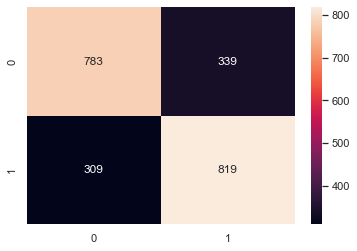

In [122]:
score=accuracy_score(y_test,y_pred)
print("Test Score:{:.2f}%".format(score*100))

# Print the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Print the confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Plot the confusion matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')
plt.show()

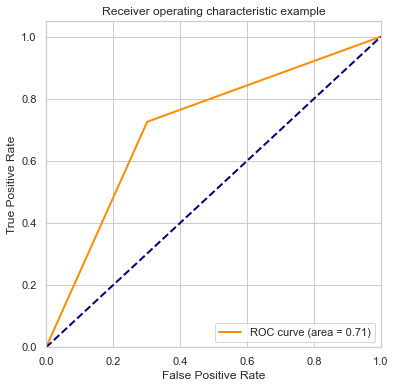

In [123]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()


**Tweet Prediction Using LSTM Model**

In [150]:
#Creating a prediction function and predicting if its spam or ham.
def predict_out_lstm(text):
    #Preprocessing the custom text
    preprocessed_text = clean_text(text)
    #Vectorizing the custom text using the same vectorizer used during training
    custom_text_features = vectorizer.transform([preprocessed_text])
  # Perform one-hot encoding on the processed sentences
    one_hot_encodings = [one_hot(text, n=vocab_size) for sentence in custom_text_features]

    # Pad the sequences to have the same length
    padded_sequences = pad_sequences(one_hot_encodings, maxlen=sentence_len, padding='pre')
    
    # Predict the label for the text using the model
    predicted_label = lstm_model.predict(padded_sequences)
    
    #Showing the pridiction
    if predicted_label[0] >=0.5:
        prediction = "positive"
    else:
        prediction = "negative"
    print("Predicted Sentiment Tweet:", prediction)

In [151]:
text1 = "I hate this product!"
predict_out_lstm(text1)

1/1 [==============================] - 0s 315ms/step
Predicted Sentiment Tweet: negative


In [152]:
text2 = 'WOW ! Such a beautiful day!!!'
predict_out_lstm(text2)

1/1 [==============================] - 0s 325ms/step
Predicted Sentiment Tweet: positive
